# CLaSP 405-002
## Potential solution to HW 5, part 2.2
### Calculating least-squares fit of a trigonometric function
**Prepared by: Brian Swiger, Course TA, Feb 21, 2020**

Problem description:
Kuskokwim Bay, off the Bering Sea near Alaska, has a sea ice concentration that varies somewhat sinusoidally over the course of a year.

(a) For 2018 the sea ice concentration percentages are as follows:

| Mar | Apr | May | Jun | Jul | Aug | Sep | Oct | Nov | Dec | Jan | Feb | Mar |
| --- | --- |---  | --- |  ---|  ---| --- | --- |  ---| --- |  ---|  ---|  ---|
|82	  | 59  |	9 |	8	|8    |	0	|0    | 20	| 35  |	79	|72   |	79 	| 82  |

Conduct a fit to this function:
	
Ice concentration = $A + B \cdot \cos[(\textrm{month #}) \cdot \pi / 6]$

Please feel free to use Python or whatever calculation software to do this fit.
Also calculate $\sigma_y$, the uncertainty on $A$ and $B$. Show work and report the final values to the correct significant digits.

(b)
For 1918:

| Mar | Apr | May | Jun | Jul | Aug | Sep | Oct | Nov | Dec | Jan | Feb | Mar |
| --- | --- |---  | --- |  ---|  ---| --- | --- |  ---| --- |  ---|  ---|  ---|
|90	  | 95  |96   |	78	| 0   |	0	|0    | 5	| 50  |	97	|97   |	86 	| 90  |


Calculate new coefficient values of $A$ and $B$, and their uncertainties (including $\sigma_y$).

(c) Choosing 2018 as the current truth, conduct tests to determine if $A$ and $B$ are the same from 1918 to 2018. Explain your answer.

(d) In a sentence or two, explain the meaning of $\sigma_y$.


### Solution

**We will perform the following steps:**
0. [Import useful packages.](#step-0-cell)
1. [Encode the data into a Pandas DataFrame](#step-1-cell)
2. [Define the function to represent sea ice extent](#step-2-cell)
3. [Use `scipy.optimize.curve_fit()` to perform a least-squares fit of our data to the function](#step-3-cell)
4. [Visualize (plot) the data and curve fit together.](#step-4-cell)
5. [Use the covariance to find the uncertainty on $A$ and $B$](#step-5-cell)
6. [Repeat steps 3-5 for part b)](#step-6-cell)
7. [Perform hypothesis test](#step-7-cell)
8. [Bonus 2: Extra parameters to fit](#step-8-cell)

<a id='step-0-cell'></a>
#### Step 0. Import useful packages.

In [1]:
import math
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

<a id='step-1-cell'></a>

#### Step 1. Encode the data into a Pandas DataFrame

In [2]:
# We need to be mindful of the repeated data measurement for March
month_names = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
               'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
month_numbers = list(range(3, 13, 1)) + list(range(1, 4, 1))
sea_ice_2018 = [82, 59, 9, 8, 8, 0, 0, 20, 35, 79, 72, 79, 82]
sea_ice_1918 = [90, 95, 96, 78, 0, 0, 0, 5, 50, 97, 97, 86, 90]

sea_ice_data = pd.DataFrame( {
                             'month_number': month_numbers, 
                             '2018': sea_ice_2018,
                             '1918': sea_ice_1918,
                             'month_names': month_names
                             },
                             index=range(0, 13, 1))

# Let's show the entire data frame since it is small enough to see all the contents.
sea_ice_data

,month_number,2018,1918,month_names
0,3,82,90,Mar
1,4,59,95,Apr
2,5,9,96,May
3,6,8,78,Jun
4,7,8,0,Jul
5,8,0,0,Aug
6,9,0,0,Sep
7,10,20,5,Oct
8,11,35,50,Nov
9,12,79,97,Dec


Notice how we set the index of this DataFrame. This will be useful later for plotting!

<a id='step-2-cell'></a>
#### Step 2. Define the function to represent sea ice extent

In [3]:
def sea_ice_func(month_number, a, b):
    return a + b * np.cos(month_number * math.pi / 6)

<a id='step-3-cell'></a>
#### Step 3 (option 1). Use `scipy.optimize.curve_fit()` 

#### Important!

- If you interpreted *month number* as month of the year, use the `month_number` column.
- If you interpreted *month number* as given in the order of the dataset, use the `index`.

In [4]:
### Uncomment the next two lines if you interpret 'month number' as month of the year.
months = np.array(range(3, 16, 1))
model_xvals = np.arange(3, 15, 0.1)
# ----------------------------------------

# We will use model_xvals to make the fit curves look smooth.

### Uncomment the next two lines if you interpret 'month number' as given in the dataset.
#months = sea_ice_data.index
#model_xvals = np.arange(0, 12, 0.1)
# -------------------------

data_2018 = sea_ice_data['2018']
popt2018, pcov2018 = curve_fit(sea_ice_func, 
                               months, 
                               data_2018)

#### Step 3 (option 2). Use a linear fit.

In [5]:
# Transform the equation into a linear equation.
# This involves transforming the 'x' values.
linear_x_vals = np.cos(months * np.pi / 6)

In [6]:
# Calculate linear fit with transformed x values.
slope2018, intercept2018, *_ = stats.linregress(linear_x_vals, data_2018)

The slope and intercept are the same as the `A` and `B` found using `curve_fit`.

In [7]:
print(math.isclose(popt2018[0], intercept2018, rel_tol=1e-5))
print(math.isclose(popt2018[1], slope2018, rel_tol=1e-5))

True
True


#### Step 3 (option 3). Calculate by hand or other software.

In [8]:
altA_2018, altB_2018 = 38.2, 35.3   # found using Excel.

**Let's compare the `scipy` solution to by-hand solution using RMSE.**

Note that $\textrm{RMSE} = \sigma_y$.

How do we calculate $\sigma_y$?

$$ \sigma_y = \sqrt{\frac{1}{N-p}\sum_i^N \left(y_i - \hat{y}_i \right)^2 } $$

where $\hat{y}_i = F \left(x_i \right) $, $N$ is the number of observations, and $p$ is the number of free parameters.

In this model:

$$ F \left(x_i \right) = A + B \cdot \cos\left(x_i \frac{\pi}{6} \right) $$

So we calculate,

$$ \sigma_y = \sqrt{\frac{1}{N-2}\sum_i^N \left(y_i -  A - B \cdot \cos\left(x_i \frac{\pi}{6} \right)\right)^2 } $$

In [9]:
def calc_rmse(yobs, ymodel, num_params=2):
    '''
    given observations *yobs* and model *ymodel*, calculate and return
    root-mean-squared-error
    '''
    # Number of observations
    N = len(yobs)
    
    residuals = yobs - ymodel
    squared_resids = np.power(residuals, 2)
    
    # Sum of Squared Residuals
    ssr = np.sum(squared_resids)
    
    return np.sqrt(ssr / (N-num_params))

In [10]:
# RMSE
# The * operator unpacks the values that are contained in popt2018
model_2018 = sea_ice_func(months, *popt2018)
model_alt_2018 = sea_ice_func(months, altA_2018, altB_2018)

rmse_2018 = calc_rmse(data_2018, model_2018)
rmse_alt_2018 = calc_rmse(data_2018, model_alt_2018)


print('scipy rmse:   {:.5f}'.format(rmse_2018))
print('by-hand rmse: {:.5f}'.format(rmse_alt_2018))

scipy rmse:   29.87715
by-hand rmse: 30.49163


<a id='step-4-cell'></a>
#### Step 4. Visualize fit.

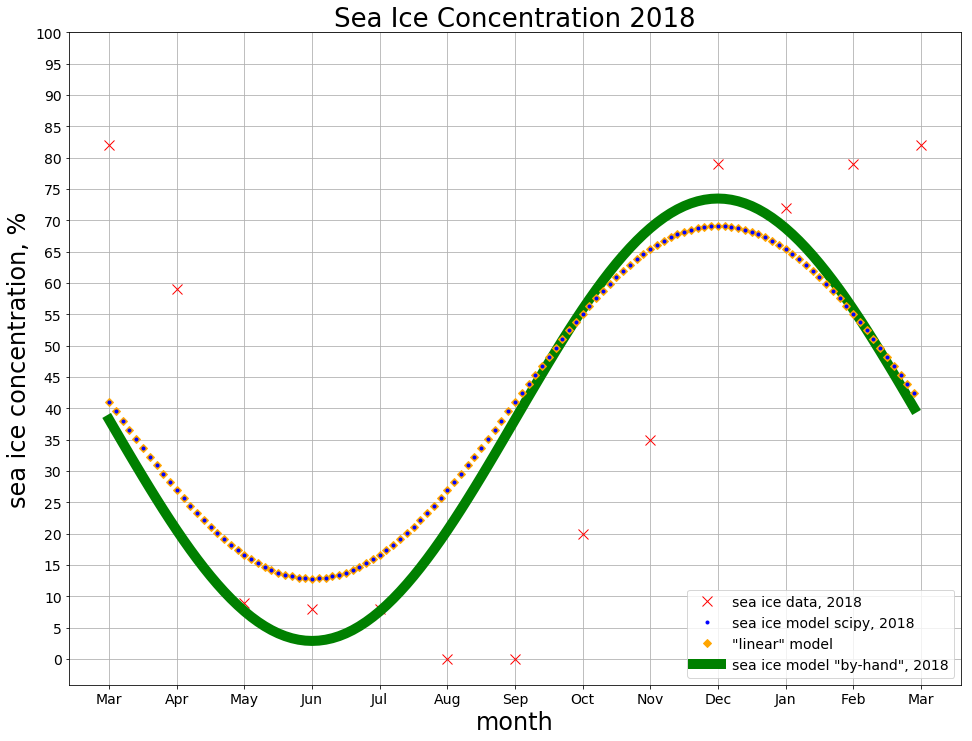

In [11]:
# Get model data using more frequent x values.
model_2018 = sea_ice_func(model_xvals, *popt2018)
lin_model_2018 = intercept2018 + slope2018 * np.cos(model_xvals * np.pi / 6)
model_alt_2018 = sea_ice_func(model_xvals, altA_2018, altB_2018)

# Create a figure.
fig, ax = plt.subplots(figsize=(16, 12))


# Populate figure with data.
ax.plot(months, data_2018, 
        marker='x', ls='', ms=10, color='red', label='sea ice data, 2018')

# Put the model curves on figure.
ax.plot(model_xvals, model_2018, marker='.', zorder=20,
        ls='', color='blue', label='sea ice model scipy, 2018')

ax.plot(model_xvals, lin_model_2018, color='orange', ms=5, marker='D', ls='',
        zorder=10, label='"linear" model')

ax.plot(model_xvals, model_alt_2018, lw=10,
        ls='-', color='green', label='sea ice model "by-hand", 2018')

# Set up labels.
ax.set_xticks(months)
ax.set_xticklabels(sea_ice_data.month_names)
ax.tick_params(labelsize=14)

ax.set_xlabel('month', fontsize=24)
ax.set_ylabel('sea ice concentration, %', fontsize=24)

ax.set_yticks(range(0, 105, 5))
ax.set_title('Sea Ice Concentration 2018', fontsize=26)
ax.legend(loc='lower right', fontsize=14)
ax.grid()


<a id='step-5-cell'></a>
**Step 5. Use the covariance to find the uncertainty on $A$ and $B$.**

In [12]:
A2018, B2018 = popt2018 
sigma_A2018, sigma_B2018 = np.sqrt(np.diag(pcov2018))

print("With 2018 data: \nA = {0:.3f}\nB = {1:.3f}".format(A2018, B2018))
print("Uncertainty \nsigmaA: {:0.3f}\nsigmaB: {:0.3f}".format(sigma_A2018, sigma_B2018))

With 2018 data: 
A = 41.000
B = 28.157
Uncertainty 
sigmaA: 8.286
sigmaB: 12.197


**Step 6. Repeat steps 3-5 for part b).**
<a id='step-6-cell'></a>

In [13]:
# Scipy solution.
data_1918 = sea_ice_data['1918']
popt1918, pcov1918 = curve_fit(sea_ice_func, months, data_1918)

# By-hand solution.
altA_1918, altB_1918 = 56.49, 49.6

**Calculate RMSE ($\sigma_y$) again.**

In [14]:
# Calculate model data.
model_1918 = sea_ice_func(data_1918, *popt1918)
model_alt_1918 = sea_ice_func(data_1918, altA_1918, altB_1918)

# Calculate RMSE.
rmse_1918 = calc_rmse(data_1918, model_1918)
rmse_alt_1918 = calc_rmse(data_1918, model_alt_1918)


    
print('scipy rmse:   {:.5f}'.format(rmse_1918))
print('by-hand rmse: {:.5f}'.format(rmse_alt_1918))

scipy rmse:   47.25643
by-hand rmse: 69.96366


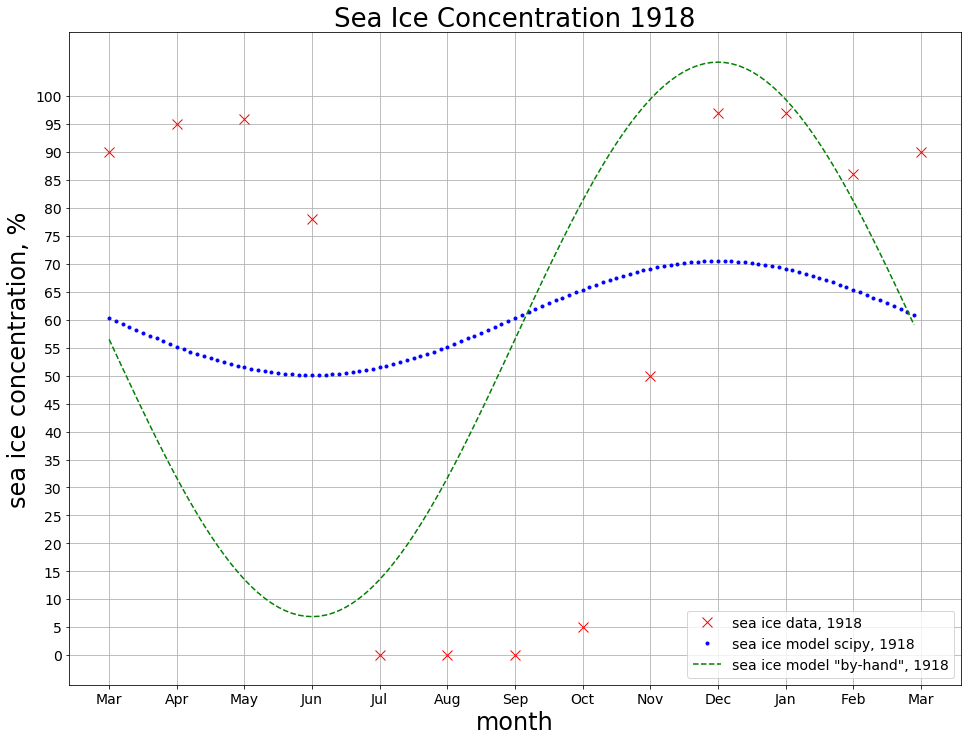

In [15]:
# Give model more x values to make curve look smooth.
model_1918 = sea_ice_func(model_xvals, *popt1918)
model_alt_1918 = sea_ice_func(model_xvals, altA_1918, altB_1918)

# Create a figure.
fig, ax = plt.subplots(figsize=(16, 12))

# Populate figure with data.
ax.plot(months, data_1918, 
        marker='x', ls='', ms=10, color='red', label='sea ice data, 1918')

# Put the model curves on figure.
ax.plot(model_xvals, model_1918, marker='.',
        ls='', color='blue', label='sea ice model scipy, 1918')

ax.plot(model_xvals, model_alt_1918,
        ls='--', color='green', label='sea ice model "by-hand", 1918')

# Set up labels.
ax.set_xticks(months)
ax.set_xticklabels(sea_ice_data.month_names)
ax.tick_params(labelsize=14)

ax.set_xlabel('month', fontsize=24)
ax.set_ylabel('sea ice concentration, %', fontsize=24)

ax.set_yticks(range(0, 105, 5))
ax.set_title('Sea Ice Concentration 1918', fontsize=26)
ax.legend(loc='lower right', fontsize=14)
ax.grid()


In [16]:
A1918, B1918 = popt1918 
sigma_A1918, sigma_B1918 = np.sqrt(np.diag(pcov1918))

print("With 1918 data: \nA = {0:.3f}\nB = {1:.3f}".format(A1918, B1918))
print("Uncertainty \nsigmaA: {:0.3f}\nsigmaB: {:0.3f}".format(sigma_A1918, sigma_B1918))

With 1918 data: 
A = 60.308
B = 10.195
Uncertainty 
sigmaA: 12.221
sigmaB: 17.990


<a id='step-7-cell'></a>
**Step 7. Perform hypothesis test.**

In [17]:
t_A = abs(A1918 - A2018) / sigma_A2018
t_B = abs(B1918 - B2018) / sigma_B2018

p_A = (1 - stats.t.cdf(t_A, 12)) * 2

p_B = (1 - stats.t.cdf(t_B, 12)) * 2

print("A: \nt={:.4f}\np={:.5f}".format(t_A, p_A))
print("B: \nt={:.4f}\np={:.5f}".format(t_B, p_B))

A: 
t=2.3300
p=0.03807
B: 
t=1.4727
p=0.16658


**Plot both years on same figure.**


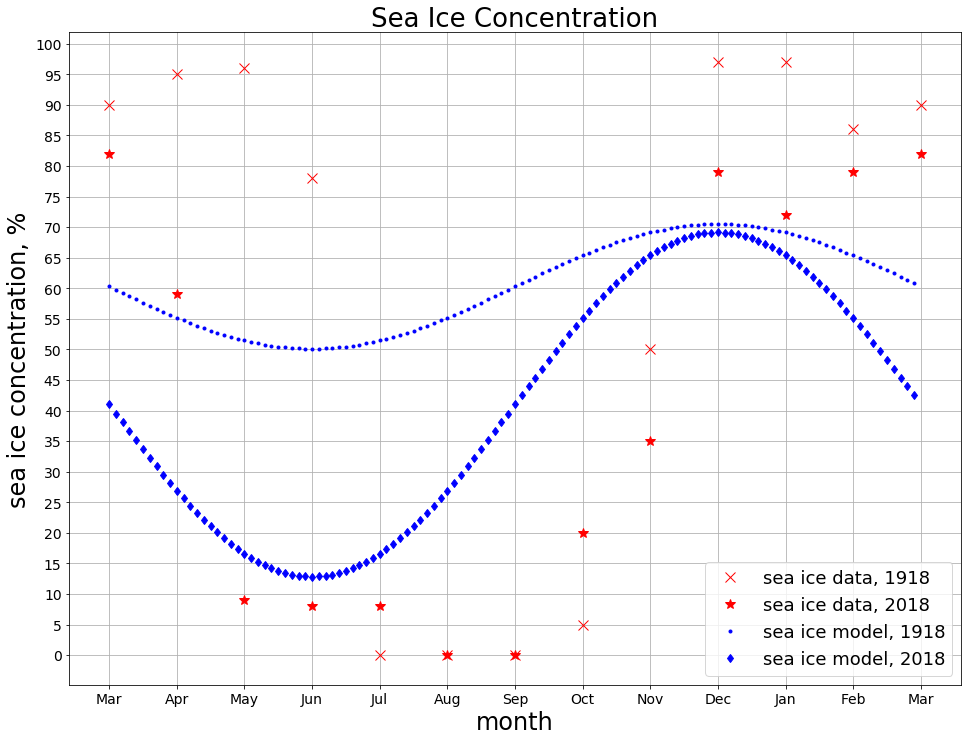

In [18]:
# Create a figure.
fig, ax = plt.subplots(figsize=(16, 12))

# Populate figure with data.
ax.plot(months, data_1918, 
        marker='x', ls='', ms=10, color='red', label='sea ice data, 1918')

ax.plot(months, data_2018,
        marker='*', ls='', ms=10, color='red', label='sea ice data, 2018')


# Put the model curve on figure.
ax.plot(model_xvals, model_1918, marker='.',
        ls='', color='blue', label='sea ice model, 1918')


ax.plot(model_xvals, model_2018, marker='d',
        ls='', color='blue', label='sea ice model, 2018')



# Set up labels.
ax.set_xticks(months)
ax.set_xticklabels(sea_ice_data.month_names)
ax.tick_params(labelsize=14)

ax.set_xlabel('month', fontsize=24)
ax.set_ylabel('sea ice concentration, %', fontsize=24)

ax.set_yticks(range(0, 105, 5))
ax.set_title('Sea Ice Concentration', fontsize=26)
ax.legend(loc='lower right', fontsize=18)
ax.grid()


<a id='step-8-cell'></a>
#### 8. Bonus: Extra parameters to fit.

In [19]:
def sea_ice_trig(month_number, a, b, c, d):
    '''
    returns cosine function
    '''
    return a + b * np.cos(month_number * c * math.pi + d)

In [20]:
# Get new parameters.
popt2018_new, pcov2018_new = curve_fit(sea_ice_trig, months, data_2018)
popt1918_new, pcov1918_new = curve_fit(sea_ice_trig, months, data_1918)

# Get model data.
new_model_2018 = sea_ice_trig(months, *popt2018_new)
new_model_1918 = sea_ice_trig(months, *popt1918_new)

**Let's compare our new fits to the old fits. First let's look at RMSE ($\sigma_y$).**

In [21]:
# Calculate RMSE.
new_rmse_1918 = calc_rmse(data_1918, new_model_1918, 4)
new_rmse_2018 = calc_rmse(data_2018, new_model_2018, 4)

# Print results.
if new_rmse_1918 < rmse_1918:
    print('new 1918 wins')
elif new_rmse_1918 > rmse_1918:
    print('old 1918 wins')
else:
    print("they can't tie!")

    
if new_rmse_2018 < rmse_2018:
    print('new 2018 wins')
elif new_rmse_2018 > rmse_2018:
    print('old 2018 wins')
else:
    print("they can't tie!")

print('new 1918 rmse: {:.5f}'.format(new_rmse_1918))
print('old 1918 rmse: {:.5f}'.format(rmse_1918))
print('new 2018 rmse: {:.5f}'.format(new_rmse_2018))
print('old 2018 rmse: {:.5f}'.format(rmse_2018))

old 1918 wins
new 2018 wins
new 1918 rmse: 48.19019
old 1918 rmse: 47.25643
new 2018 rmse: 11.20220
old 2018 rmse: 29.87715


**Now let's plot these to visually inspect if there is improvement.**

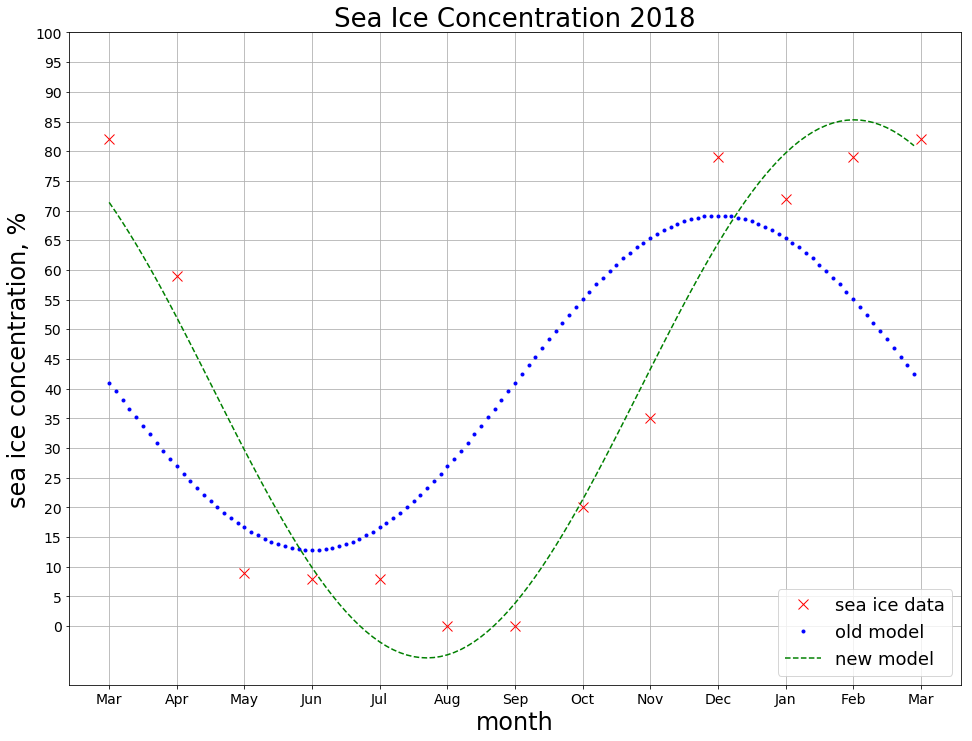

In [22]:
# Give model more x values to make curve look smooth.
new_model_2018 = sea_ice_trig(model_xvals, *popt2018_new)

# Create a figure.
fig, ax = plt.subplots(figsize=(16, 12))

# Populate figure with data.
ax.plot(months, data_2018, 
        marker='x', ls='', ms=10, color='red', label='sea ice data')


# Put the model curves on figure.
ax.plot(model_xvals, model_2018, marker='.',
        ls='', color='blue', label='old model')

ax.plot(model_xvals, new_model_2018,
        ls='--', color='green', label='new model')

# Set up labels.
ax.set_xticks(months)
ax.set_xticklabels(sea_ice_data.month_names)
ax.tick_params(labelsize=14)

ax.set_xlabel('month', fontsize=24)
ax.set_ylabel('sea ice concentration, %', fontsize=24)

ax.set_yticks(range(0, 105, 5))
ax.set_title('Sea Ice Concentration 2018', fontsize=26)
ax.legend(loc='lower right', fontsize=18)
ax.grid()


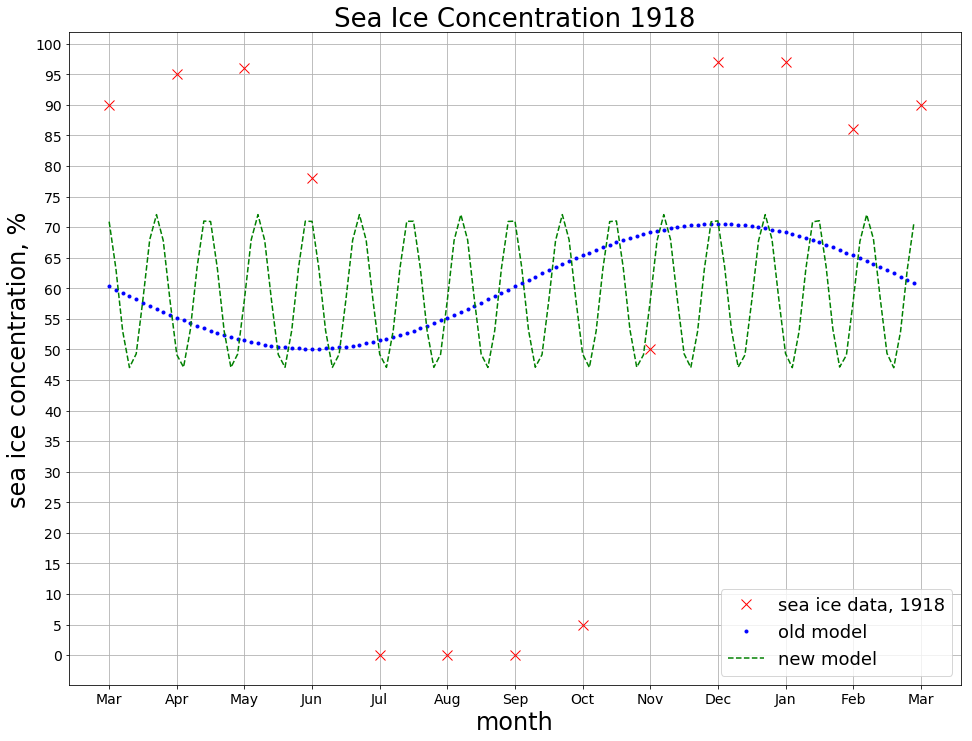

In [23]:
# Give model more x values to make curve look smooth.
new_model_1918 = sea_ice_trig(model_xvals, *popt1918_new)

# Create a figure.
fig, ax = plt.subplots(figsize=(16, 12))

# Populate figure with data.
ax.plot(months, data_1918, 
        marker='x', ls='', ms=10, color='red', label='sea ice data, 1918')


# Put the model curves on figure.
ax.plot(model_xvals, model_1918, marker='.',
        ls='', color='blue', label='old model')

ax.plot(model_xvals, new_model_1918,
        ls='--', color='green', label='new model')

# Set up labels.
ax.set_xticks(months)
ax.set_xticklabels(month_names)
ax.tick_params(labelsize=14)

ax.set_xlabel('month', fontsize=24)
ax.set_ylabel('sea ice concentration, %', fontsize=24)

ax.set_yticks(range(0, 105, 5))
ax.set_title('Sea Ice Concentration 1918', fontsize=26)
ax.legend(loc='lower right', fontsize=18)
ax.grid()


#### Maybe we used too many free parameters...
#### Let's print out fit parameters to inspect.

In [24]:
# The third item in each array controls the period.
print(popt2018_new, popt1918_new)

[39.96023195 45.32596441  0.15836389 11.878832  ] [ 59.4269006  -12.63156524   2.66574642 -15.26869752]


**Let's try the fits again, this time constraining the period, but letting the phase be a free parameter.**

In [25]:
def sea_ice_trig2(month_number, a, b, d):
    return a + b * np.cos(month_number * math.pi / 6 + d)

In [26]:
popt1918_new2, pcov1918_new2 = curve_fit(sea_ice_trig2, months, data_1918)
popt2018_new2, pcov2018_new2 = curve_fit(sea_ice_trig2, months, data_2018)

# Get model data.
new2_model_1918 = sea_ice_trig2(months, *popt1918_new2)
new2_model_2018 = sea_ice_trig2(months, *popt2018_new2)

#### And compare RMSE one more time.

In [27]:
# Calculate RMSE.
new2_rmse_1918 = calc_rmse(data_1918, new2_model_1918, 3)
new2_rmse_2018 = calc_rmse(data_2018, new2_model_2018, 3)

# Print results.
if new2_rmse_1918 < new_rmse_1918:
    print('new2 1918 wins')
elif new2_rmse_1918 > new_rmse_1918:
    print('old 1918 wins')
else:
    print("they can't tie!")

    
if new2_rmse_2018 < new_rmse_2018:
    print('new2 2018 wins')
elif new2_rmse_2018 > new_rmse_2018:
    print('old 2018 wins')
else:
    print("they can't tie!")

print('new2 1918 rmse: {:.5f}'.format(new2_rmse_1918))
print('new 1918 rmse:  {:.5f}'.format(new_rmse_1918))
print('new2 2018 rmse: {:.5f}'.format(new2_rmse_2018))
print('new 2018 rmse:  {:.5f}'.format(new_rmse_2018))


new2 1918 wins
new2 2018 wins
new2 1918 rmse: 20.74772
new 1918 rmse:  48.19019
new2 2018 rmse: 10.98167
new 2018 rmse:  11.20220


#### Looks much better. Let's plot to see.

### Now let's plot only our newest models for 2018 and 1918 together.

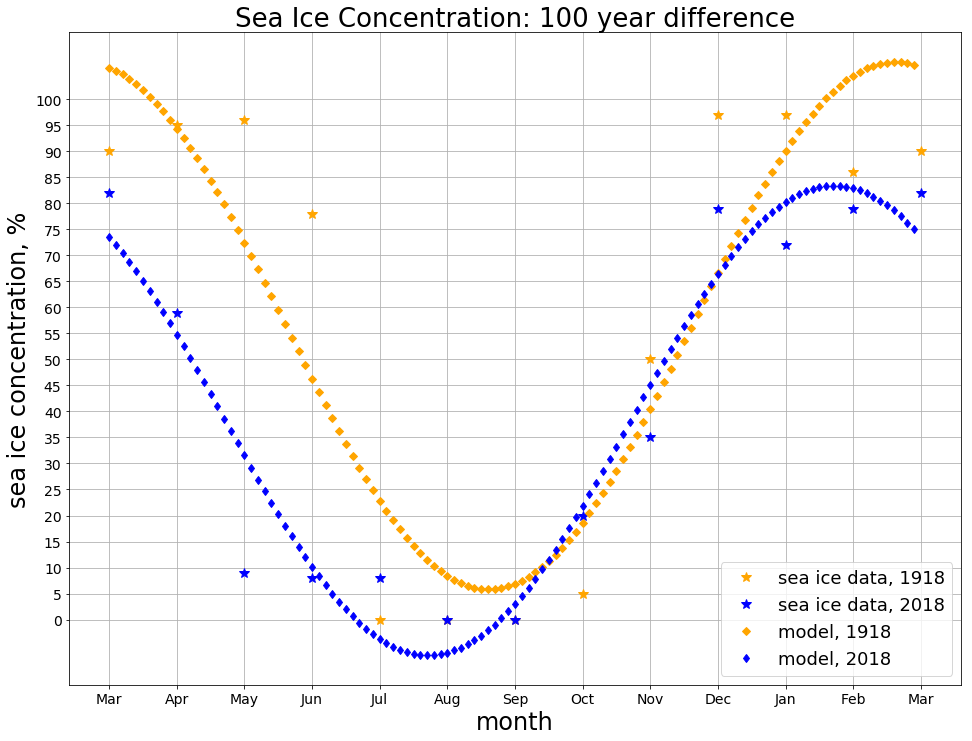

In [28]:
# Give model more x values to make curve look smooth.
new2_model_1918 = sea_ice_trig2(model_xvals, *popt1918_new2)
new2_model_2018 = sea_ice_trig2(model_xvals, *popt2018_new2)


# Create a figure.
fig, ax = plt.subplots(figsize=(16, 12))

# Populate figure with data.
ax.plot(months, data_1918, 
        marker='*', ls='', ms=10, color='orange', label='sea ice data, 1918')

ax.plot(months, data_2018,
        marker='*', ls='', ms=10, color='blue', label='sea ice data, 2018')


# Put the model curves on figure.
ax.plot(model_xvals, new2_model_1918, marker='D', ms=5,
        ls='', color='orange', label='model, 1918')


ax.plot(model_xvals, new2_model_2018, marker='d',
        ls='', color='blue', label='model, 2018')


# Set up labels.
ax.set_xticks(months)
ax.set_xticklabels(month_names)
ax.tick_params(labelsize=14)

ax.set_xlabel('month', fontsize=24)
ax.set_ylabel('sea ice concentration, %', fontsize=24)

ax.set_yticks(range(0, 105, 5))
ax.set_title('Sea Ice Concentration: 100 year difference', fontsize=26)
ax.legend(loc='lower right', fontsize=18)
ax.grid()


#### Better, but now we have a model predicting $>$ 100% sea ice concentration and another one predicting $<$ 0%!

One can continue adjusting the fit, for example, there is a `bounds` parameter of `curve_fit` that sets the bounds the fit parameters can have.

**Finally, let us re-calculate the hypothesis that the `A` and `B` (and now `D`) parameters are the same for both of these models.**

In [29]:
A1918, B1918, D1918 = popt1918_new2 
sigma_A1918, sigma_D1918, sigma_C1918 = np.sqrt(np.diag(pcov1918_new2))

A2018, B2018, D2018 = popt2018_new2 
sigma_A2018, sigma_B2018, sigma_D2018 = np.sqrt(np.diag(pcov2018_new2))

# unicode number for the plus-minus symbol; use with 'c' format code.
pm = 177

#the backslash means line continuation
params_2018_string = "With 2018 data: \nA = {0:.3f} {3:c} {4:.3f}" \
                   + "\nB = {1:.3f} {3:c} {5:.3f}" \
                   + "\nD = {2:.3f} {3:c} {6:.3f}\n"

print(params_2018_string.format(
      A2018, B2018, D2018, pm, sigma_A2018, sigma_B2018, sigma_D2018))


params_1918_string = "With 1918 data: \nA = {0:.3f} {3:c} {4:.3f}" \
                   + "\nB = {1:.3f} {3:c} {5:.3f}" \
                   + "\nD = {2:.3f} {3:c} {6:.3f}\n"

print(params_1918_string.format(
      A1918, B1918, D1918, pm, sigma_A1918, sigma_B1918, sigma_D1918))


# Now we will perform a Welch's t test, using:
# stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True)

N = 13 # number of observations, equal for both samples in this case.

t_A, p_A = stats.ttest_ind_from_stats(A1918, sigma_A1918, N, A2018, sigma_A2018, N, False)
t_B, p_B = stats.ttest_ind_from_stats(B1918, sigma_B1918, N, B2018, sigma_B2018, N, False)
t_D, p_D = stats.ttest_ind_from_stats(D1918, sigma_D1918, N, D2018, sigma_D2018, N, False)
    
    

print("A (upward/downward): \nt={:.4f}\np={:.4e}\n".format(t_A, p_A))
print("B (amplitude): \nt={:.4f}\np={:.4e}\n".format(t_B, p_B))
print("D (phase): \nt={:.4f}\np={:.4e}".format(t_D, p_D))

With 2018 data: 
A = 38.287 ± 3.063
B = -45.132 ± 4.297
D = -41.738 ± 0.097

With 1918 data: 
A = 56.490 ± 5.786
B = -50.669 ± 17.990
D = -35.926 ± 7.910

A (upward/downward): 
t=10.0250
p=7.5747e-09

B (amplitude): 
t=-1.0793
p=2.9954e-01

D (phase): 
t=2.6491
p=2.1209e-02


We have sufficient evidence that there is statistically significant differences for the `A`, `B`, and `D` parameters, which control the mean, amplitude, and phase of the model curves, respectively. This, in concert with the above figure, suggests that the sea ice concentration is melting earlier in the year, the *mean* ice concentration is not as high, and the *maximum* ice concentration is not as high during year 2018 compared to year 1918.